In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/vaccination_nlp/vaccination_tweets.csv")
data.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                2518 non-null   int64 
 1   user_name         2518 non-null   object
 2   user_location     1998 non-null   object
 3   user_description  2394 non-null   object
 4   user_created      2518 non-null   object
 5   user_followers    2518 non-null   int64 
 6   user_friends      2518 non-null   int64 
 7   user_favourites   2518 non-null   int64 
 8   user_verified     2518 non-null   bool  
 9   date              2518 non-null   object
 10  text              2518 non-null   object
 11  hashtags          1884 non-null   object
 12  source            2517 non-null   object
 13  retweets          2518 non-null   int64 
 14  favorites         2518 non-null   int64 
 15  is_retweet        2518 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 280.4+ KB


In [ ]:
columns = []
for i in data.columns:
  columns.append(i)
columns

['id',
 'user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'retweets',
 'favorites',
 'is_retweet']

In [ ]:
data.isnull().sum()

id                    0
user_name             0
user_location       520
user_description    124
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            634
source                1
retweets              0
favorites             0
is_retweet            0
dtype: int64

In [ ]:
null_value_columns = []
for i in data.columns:
  if data[i].isnull().any() == True:
    null_value_columns.append(i)
null_value_columns

['user_location', 'user_description', 'hashtags', 'source']

In [ ]:
np.where(data['user_location'].isnull())

(array([   4,    7,    8,   11,   13,   14,   20,   24,   36,   42,   46,
          47,   50,   61,   66,   70,   74,   97,   98,  106,  107,  108,
         112,  114,  121,  123,  132,  137,  141,  144,  148,  153,  158,
         161,  166,  167,  169,  170,  193,  194,  195,  197,  209,  210,
         213,  219,  224,  228,  230,  236,  237,  241,  247,  268,  272,
         277,  279,  281,  287,  294,  296,  306,  312,  313,  320,  326,
         327,  328,  329,  333,  345,  354,  355,  359,  360,  365,  369,
         373,  375,  378,  379,  380,  381,  385,  386,  389,  392,  395,
         399,  401,  405,  406,  430,  440,  442,  443,  450,  452,  454,
         458,  484,  489,  494,  496,  499,  500,  504,  507,  508,  512,
         514,  547,  557,  564,  566,  567,  580,  581,  590,  591,  595,
         599,  605,  606,  609,  613,  624,  626,  627,  629,  630,  631,
         636,  642,  644,  645,  647,  649,  655,  672,  673,  683,  697,
         702,  703,  711,  719,  724, 

In [ ]:
data['user_location'] = data["user_location"].fillna("Location Unavialable")
data['user_description'] = data["user_description"].fillna("User Description Unavialable")
data['hashtags'] = data["hashtags"].fillna("Hashtag Unavialable")
data['source'] = data["source"].fillna("Source Unavialable")

In [ ]:
data.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

In [ ]:
for i in columns:
  print("number of unique values in",i,"is = ",len(np.unique(data[i])))

number of unique values in id is =  2518
number of unique values in user_name is =  1704
number of unique values in user_location is =  876
number of unique values in user_description is =  1614
number of unique values in user_created is =  1703
number of unique values in user_followers is =  1307
number of unique values in user_friends is =  1157
number of unique values in user_favourites is =  1616
number of unique values in user_verified is =  2
number of unique values in date is =  2516
number of unique values in text is =  2518
number of unique values in hashtags is =  1192
number of unique values in source is =  27
number of unique values in retweets is =  42
number of unique values in favorites is =  115
number of unique values in is_retweet is =  1


In [ ]:
# Label encoding the data set
from sklearn.preprocessing import LabelEncoder
data['user_name'] = LabelEncoder().fit_transform(data['user_name'])
data['user_location'] = LabelEncoder().fit_transform(data["user_location"])
data['user_description'] = LabelEncoder().fit_transform(data["user_description"])
data['hashtags'] = LabelEncoder().fit_transform(data["hashtags"])
data['source'] = LabelEncoder().fit_transform(data["source"])

In [ ]:
data.drop ('date', axis = 1, inplace = True)

KeyError: ignored

In [ ]:
data.drop('user_created',axis = 1,inplace=True)

In [ ]:
data.drop('is_retweet',axis = 1,inplace=True)

In [ ]:
data.drop('id',axis = 1,inplace=True)

In [ ]:
data.head(2)

,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites
0,1139,386,140,405,1692,3247,0,Same folks said daikon paste could treat a cyt...,754,23,0,0
1,63,647,867,834,666,178,0,While the world has been on the wrong side of ...,0,22,1,1


In [ ]:
data['user_verified'].replace(False,0,inplace=True)
data['user_verified'].replace(True,1,inplace=True)
data['user_verified'] =data['user_verified'].astype(int)

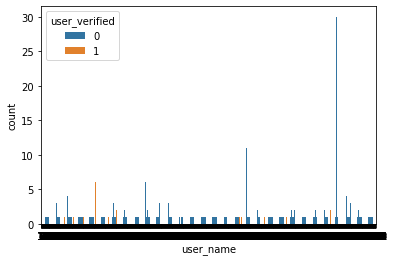

In [ ]:
sns.countplot(x='user_name',hue='user_verified',data=data)

In [ ]:
take = []
drop = []
for j in data.columns:
  if j == 'text' or j == 'user_verified':
    take.append(j)
  else:
    drop.append(j)

drop

['user_name',
 'user_location',
 'user_description',
 'user_followers',
 'user_friends',
 'user_favourites',
 'hashtags',
 'source',
 'retweets',
 'favorites']

In [ ]:
data.drop(drop,axis=1,inplace=True)

In [ ]:
x = data['text']
y = data['user_verified']

In [ ]:
verified_user = []
not_verified_user = []
for i in data['user_verified']:
  if i == 1:
    verified_user.append(i)
  else:
    not_verified_user.append(i)

print("percentage of verified user = ",((len(verified_user)/len(data['user_verified']))*100))

print("percentage of not verified user = ",((len(not_verified_user)/len(data['user_verified']))*100))

percentage of verified user =  14.138204924543288
percentage of not verified user =  85.86179507545671


## TEXT PREPROCESSING

In [ ]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(10000,lower=True)
tokenizer.fit_on_texts(x)

sequence = tokenizer.texts_to_sequences(x)
final_x = pad_sequences(sequence,maxlen=200,padding='pre')
final_y = np.array(y)

## MODEL BUILDING

In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional,LSTM,Dense,Embedding

In [ ]:
model = Sequential()
model.add(
    Embedding(
        input_dim=10000,
        output_dim=120,
        input_length=200,
    ),)
model.add(
    Bidirectional(LSTM(64, return_sequences=True))
)
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 120)          1200000   
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 128)          94720     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,336,001
Trainable params: 1,336,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
pred = model.fit(final_x,final_y,epochs=5,batch_size=32)

Epoch 1/5
79/79 [==============================] - 35s 440ms/step - loss: 2.1808 - accuracy: 0.8586
Epoch 2/5
79/79 [==============================] - 35s 439ms/step - loss: 2.1808 - accuracy: 0.8586
Epoch 3/5
79/79 [==============================] - 35s 439ms/step - loss: 2.1808 - accuracy: 0.8586
Epoch 4/5
79/79 [==============================] - 35s 444ms/step - loss: 2.1808 - accuracy: 0.8586
Epoch 5/5
79/79 [==============================] - 35s 447ms/step - loss: 2.1808 - accuracy: 0.8586
